# Problem 1: Square Root of an Integer

Find the floor value of the square root of an integer without using any Python library.

E.g. if the given number is 16, then the answer would be 4.

If the given number is 27, the answer would be 5 because `sqrt(27) = 5.196` whose floor value is 5.

The expected time complexity is `O(log(n))`.

## Algorithm choice
At first, I came up with an algorithm that seemed to work well with `O(log(n))` time complexity - but I tested it only values for up to `n = 100` (and overlooked a few failed test cases, oups).

Once I added an edge case of `n = 999999`, the time complexity sky rocketed for my algorithm. So I searched for and found a simple [algorithm](http://www.math.com/school/subject1/lessons/S1U1L9DP.html) which solved my problem.

Inspired by this, I added an optional section where I compare the results and time complexity of my own vs. the improved algorithm.

In [1]:
def sqrt(number):
    """
    Calculate the floored square root of a number

    Args:
       number(int): Number to find the floored squared root
    Returns:
       int: Floored Square Root
    """
    assert(number >= 0), "The argument has to be positive"
    
    _steps = 0
    if number <= 1:
        return number, _steps
    
    # First, find two square numbers that our number lies between.
    # This takes <= O(log(n)) time.
    num = 2
    while num*2 < number//(num*2):
        _steps += 1
        num *= 2
    
    # These are the two square numbers:
    n1 = num
    n2 = num*2
        
    while True:
        _steps += 1
        # Divide the number by the two square numbers
        d1 = number/n1
        d2 = number/n2
        
        # Average the two square numbers and the divided numbers
        # to estimate the square root of our number
        root = (n1 + n2 + d1 + d2)/4
        
        # Check if we're close to the square root of our number
        root_floor = root//1
        root_ceil = (root + 1)//1
        if root_floor * root_floor <= number and root_ceil * root_ceil >= number:
            return int(root_floor), _steps
        else:
            n1 = root_floor
            n2 = root_ceil

# Tests

In [2]:
import math

def test_sqrt(number):
    own_square_root, _num_steps = sqrt(number)
    square_root = int(math.floor(math.sqrt(number)))
    
    correct_square_root = square_root == own_square_root
    correct_time_complexity = (number == 0) or _num_steps <= math.ceil(math.log2(number))
    correct_time_complexity = True

    print("PASS" if  (correct_square_root and correct_time_complexity) 
          else "--FAIL for number: " + str(number))

In [3]:
for number in [10, 9, 0, 16, 1, 27, 2, 3, 4, 5, 25, 100, 999999, 92381739019381112]:
    test_sqrt(number)
    
# NOTE: Uncomment this to check if the error message is thrown correctly. In order to run the
# optional analysis and visualizations after these tests, comment this test case out again.
# test_sqrt(-1)

PASS
PASS
PASS
PASS
PASS
PASS
PASS
PASS
PASS
PASS
PASS
PASS
PASS
PASS


## OPTIONAL - I tested my own algorithm and made some plots.

In [8]:
def my_own_algorithm_sqrt(number):
    """
    Calculate the floored square root of a number

    Args:
       number(int): Number to find the floored squared root
    Returns:
       int: Floored Square Root
    """
    assert(number >= 0), "The argument has to be positive"
    
    _steps = 0
    if number <= 1:
        return number, _steps
    
    # First, find a square number that is smaller than our number.
    # This takes <= O(log(n)) time.
    num = 2
    while num*2 < number//(num*2):
        _steps += 1
        num *= 2
    
    # Next, check if our square number == our number. If not, increase our square
    # number by one until we have the correct result. This takes O(n) time.
    while True:
        _steps += 1
        if num * num == number or (num + 1)*(num + 1) > number:
            return num, _steps
        else:
            num += 1

In [9]:
def test_own_sqrt(number):
    own_square_root, _num_steps = my_own_algorithm_sqrt(number)
    square_root = int(math.floor(math.sqrt(number)))
    
    correct_square_root = square_root == own_square_root
    correct_time_complexity = (number == 0) or _num_steps <= math.ceil(math.log2(number))
    correct_time_complexity = True

    print("PASS" if  (correct_square_root and correct_time_complexity) 
          else "--FAIL for number: " + str(number))

In [10]:
for number in [10, 9, 0, 16, 1, 27, 2, 3, 4, 5, 25, 100, 999999, 92381739019381112]:
    test_own_sqrt(number)

PASS
PASS
PASS
PASS
PASS
PASS
--FAIL for number: 2
--FAIL for number: 3
PASS
PASS
PASS
PASS
PASS
PASS


## Compare & visualize time complexity for both algorithms

Square Roots:
Own algorithm: blue
Improved algorithm: green
From math library: red


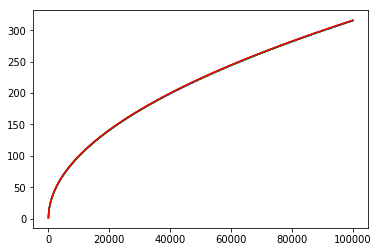

They are so close to each other, we can not distinguish them visually.

Let's zoom in to a smaller range of values:


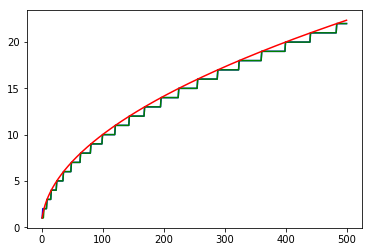

Let's zoom in more!


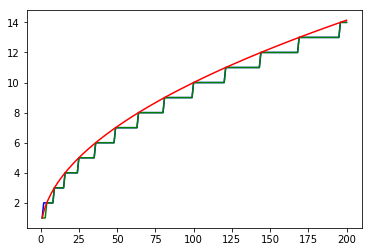

Looks good so far. We can see the steps from applying the floor function.There's something happening for small values though, let's take a closer look.


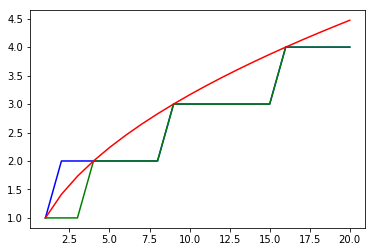

My own algorithm fails for number = 2. Good we plotted this.

Time complexity:
Own algorithm: blue
Improved algorithm: green
O(log(n)): red


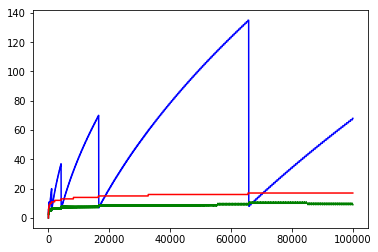

The time complexity from my own algorithm is O(log(n) + n) and grows so fast, it overflows. You can see the overflow in form of the zig-zag.'n'
Let's look closer at the time complexity of the improved algorithm vs. O(log(n)):
Improved algorithm: green
O(log(n)): red


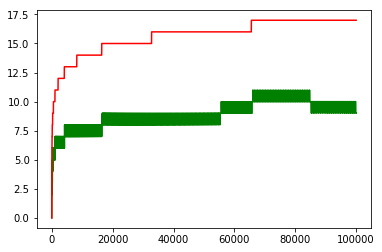

It is clear that the time complexity of the improved algorithm is < O(log(n)). Success!


In [11]:
try:
    import matplotlib.pyplot as plt
    nums = [i for i in range(1,100000)]
    
    def plot_time_complexity(numbers):
        # Save the square roots, time complexity, and upper limit (O(log(n))) in arrays
        # for both algorithms:

        # My own algorithm
        roots_own = []
        t_complexity_own = []

        # The improved algorithm from external sources
        roots_improved = []
        t_complexity_improved = []

        # Upper required limit for time complexity
        t_complexity_nominal = []
        roots_nominal = []

        for num in numbers:
            root_own, steps_own = my_own_algorithm_sqrt(num)
            root_improved, steps_improved = sqrt(num)

            roots_own.append(root_own)
            roots_improved.append(root_improved)

            t_complexity_own.append(steps_own)
            t_complexity_improved.append(steps_improved)

            t_complexity_nominal.append(math.ceil(math.log2(num)))
            roots_nominal.append(math.sqrt(num))


        print("Square Roots:")
        print("Own algorithm: blue")
        print("Improved algorithm: green")
        print("From math library: red")
        plt.plot(numbers, roots_own, 'b', 
                 numbers, roots_improved, 'g', 
                 numbers, roots_nominal, 'r')
        plt.show()
        print("They are so close to each other, we can not distinguish them visually.\n")


        print("Let's zoom in to a smaller range of values:")
        plt.plot(numbers[:500], roots_own[:500], 'b', 
                 numbers[:500], roots_improved[:500], 'g', 
                 numbers[:500], roots_nominal[:500], 'r')
        plt.show()

        print("Let's zoom in more!")
        plt.plot(numbers[:200], roots_own[:200], 'b', 
                 numbers[:200], roots_improved[:200], 'g', 
                 numbers[:200], roots_nominal[:200], 'r')
        plt.show()


        print("Looks good so far. We can see the steps from applying the floor function." + 
             "There's something happening for small values though, let's take a closer look.")
        plt.plot(numbers[:20], roots_own[:20], 'b', 
                 numbers[:20], roots_improved[:20], 'g', 
                 numbers[:20], roots_nominal[:20], 'r')
        plt.show()
        print("My own algorithm fails for number = 2. Good we plotted this.\n")

        print("Time complexity:")
        print("Own algorithm: blue")
        print("Improved algorithm: green")
        print("O(log(n)): red")
        plt.plot(numbers, t_complexity_own, 'b', 
                 numbers, t_complexity_improved, 'g', 
                 numbers, t_complexity_nominal, 'r')
        plt.show()
        print("The time complexity from my own algorithm is O(log(n) + n)" + 
             " and grows so fast, it overflows. You can see the overflow in form of the zig-zag.'n'")


        print("Let's look closer at the time complexity of the improved algorithm vs. O(log(n)):")
        print("Improved algorithm: green")
        print("O(log(n)): red")
        plt.plot(numbers, t_complexity_improved, 'g', 
                 numbers, t_complexity_nominal, 'r')
        plt.show()
        print("It is clear that the time complexity of the improved algorithm is < O(log(n)). Success!")

    plot_time_complexity(nums)
except ImportError:
    print('In order to run this code, you have to install matplotlib')